# BOSTON HOUSING PROJECT

### Data Set

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

This data was modified for this course and the link to the complete dataset can be found in the sklearn.datasets library

### Necessary Libaries

In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats
import re
import statsmodels.api as sm

### Loading In Data Set of Bostom Housing Project

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [11]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [4]:
boston_df.drop(columns="Unnamed: 0", inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Descriptive Statistics


##### Question One

For the 'Median Value of ownernwe-occupied-homes' provide a box plot

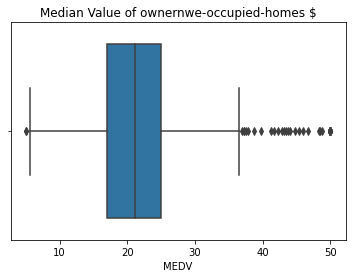

In [29]:
ax = sn.boxplot(x="MEDV", data=boston_df)

ax.set_title("Median Value of ownernwe-occupied-homes $")

plt.show()

#ax.tittle("Median Value of ownernwe-occupied-homes")

##### Question 2

Provide a bar plot for charles river variable

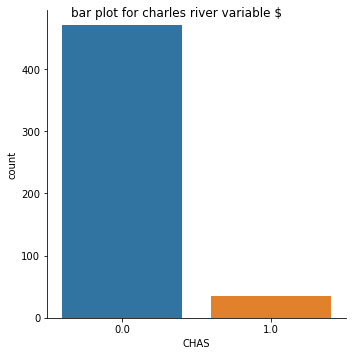

In [33]:
ax = sn.catplot(x="CHAS", kind="count", data=boston_df)

ax.fig.suptitle("bar plot for charles river variable $")

plt.show()

##### Question 3

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



In [7]:
boston_df.loc[(boston_df["AGE"] <= 35, "age_group")] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] >35)&(boston_df["AGE"] < 70), "age_group"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70, "age_group")] = "70 years and above"

In [8]:
age_group = pd.get_dummies(boston_df["age_group"])
age_group.head()

,35 years and younger,70 years and above,between 35 and 70 years
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


Text(0.5, 1.0, 'boxplot for the MEDV variable vs the AGE variable $')

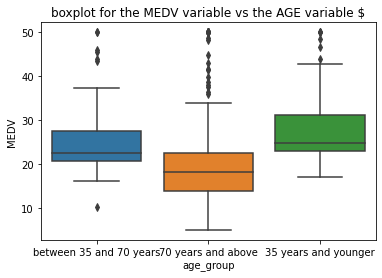

In [34]:
ax = sn.boxplot(x="age_group", y="MEDV", data=boston_df)

ax.set_title("boxplot for the MEDV variable vs the AGE variable $")

##### Question 4

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



Text(0.5, 1.0, 'scatter plot of NOX and INDUS $')

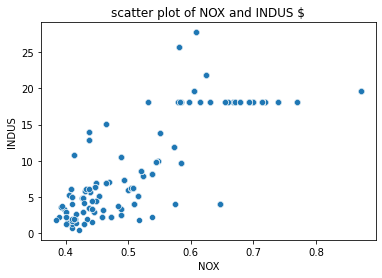

In [35]:
ax = sn.scatterplot(x="NOX", y="INDUS", data=boston_df)

ax.set_title("scatter plot of NOX and INDUS $")

##### Question 5

Create a histogram for the pupil to teacher ratio variable



Text(0.5, 1.0, 'histogram for the pupil to teacher ratio variable $')

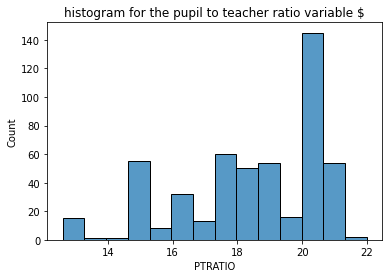

In [36]:
ax = sn.histplot(x="PTRATIO", kde=False, data=boston_df)

ax.set_title("histogram for the pupil to teacher ratio variable $")

## Hypothesis test and Regresion Analysis

##### Question 6

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



State the hypothesis

*    $H\_ 0: µ\_ 1 = µ\_ 2$ ("there is a significant difference in median value of houses bounded by the Charles river")
*    $H\_ 1: µ\_ 1 ≠ µ\_ 2$ ("there is no significant difference in median value of houses bounded by the Charles river")

The alpha value for this test is 0.05

Using the Levene's Test in Python to check test significance

In [21]:
scipy.stats.levene(boston_df[boston_df.CHAS == 0].MEDV, 
                   boston_df[boston_df.CHAS == 1].MEDV, center = "mean")

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

Since the p_value is less than 0.005, there is no sufficient evidence of equal variances.

In [25]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 0].MEDV, 
                      boston_df[boston_df.CHAS == 1].MEDV, equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**CONCLUSION** : Since the p_value is less than 0.005, we fail to reject the null hypothesis i.e, there is a significant diffrence in the /
    median value of houses bounded by the Charles river.

##### Question 7

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*    $𝐻\_0: µ\_1 = µ\_2$ ('there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940')
*    $H\_1: µ\_1 ≠ µ\_2$ ('there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940')   

The alpha level for this test is 0.05

Using the Levene's Test in Python to check test significance

In [18]:
scipy.stats.levene(boston_df[boston_df["age_group"] == "35 years and younger"]["MEDV"], 
                   boston_df[boston_df["age_group"] == "between 35 and 70 years"]["MEDV"], 
                   boston_df[boston_df["age_group"] == "70 years and above"]["MEDV"], 
                   center = "mean")

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

Since the p_value is greater than 0.05, their is sufficent evedence that they have equal variance

In [19]:
thirtyfive_below = boston_df.loc[(boston_df["AGE"] <= 35, "age_group")]
thirtyfive_seventy = boston_df.loc[(boston_df["AGE"] >35)&(boston_df["AGE"] < 70), "age_group"]
seventy_above = boston_df.loc[(boston_df["AGE"] >= 70, "age_group")]

In [38]:
scipy.stats.f_oneway(boston_df[boston_df["age_group"] == "35 years and younger"]["MEDV"], 
                   boston_df[boston_df["age_group"] == "between 35 and 70 years"]["MEDV"], 
                   boston_df[boston_df["age_group"] == "70 years and above"]["MEDV"])
                   

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclosion** : The p_value is less than 0.005, so therehfor, we reject the null hypothesis.
    This implies that there is enough evidence to prove that their is a  difference in Median 
    alues of houses (MEDV) for each proportion of owner occupied units built prior to 1940')

##### Question 8

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis

*    $𝐻\_0: µ\_1 = µ\_2$ ("there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
*    $H\_1: µ\_1 ≠ µ\_2$ ("there is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")    

In [11]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

(0.7636514469209151, 7.913361061238693e-98)

Since the p_value is less than the alpha value 0.05, we fail to reject the null hypothesis which implies that there is no significant /
evidence that shows the relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. 

##### Question 9

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis

*    $𝐻\_0: µ\_1 = µ\_2$ ("there is no ralationship between weighted distance to the five Boston employment centres and the median value of owner occupied homes")
*    $H\_1: µ\_1 ≠ µ\_2$ ("Their is a ralationship between weighted distance to the five Boston employment centres and the median value of owner occupied homes")  

The alpha value is to be taken as 0.05

In [14]:
x = boston_df["DIS"]
y = boston_df["MEDV"]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           1.21e-08
Time:                        23:13:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion** = since p < 0.05, we fail to reject the null hypothesis, that is, there exist a corrolation between ralationship between weighted distance to the five Boston/ 
employment centres and the median value of owner occupied homes
